# Neuron-Forest Fire (Name subject to change)
#### (Built under Python 3.11.4)
#### (By: Mark Ehab Aziz)

Project will be done to build and train a neural network using \<insert library name\>.

So far no idea about anything, will be looking to fix that xd.

In [20]:
# Importing Libraries
import pandas as pd                     # Dataframe operations and input
import numpy as np                      # Numerical operations, Linear Alg
import seaborn as sns                   # Visualising
from matplotlib import pyplot as plt    # Big Visualisation core

In [21]:
# Loading Data
# 1 - Path to Different Folder (I'm using within my Repo)
fire_data = pd.read_csv("../dataset/forestfires.csv")

# 2 - Same-File load
#fire_data = pd.read_csv("./forestfires.csv")

# Data Exploration
Taking a look around the rows and columns, whilst writing some definitions here to explain each column.

## Column Descriptions
- X: Spatial Data Coord for "Montesinho Park" map ranging from $1$ to $9$.
- Y: Spatial Data Coord for "Montesinho Park" map ranging from $2$ to $9$.
- month: Month of the year. ['January' $\rightarrow$ 'December]
- day: Day of the week.
- FFMC: Fine Fuel Moisture Code; represents fuel moisture of forest litter fuels under the shade of a forest canopy.\
        It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag. It ranges from 0-101.
 
- DMC: The Duff Moisture Code; represents fuel moisture of decomposed organic material underneath the litter.\
        System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels. It is unitless and open ended. 
- DC: Drought Code; represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day timelag fuels.\
      It is unitless, with a maximum value of 1000.
- ISI: Initial Spread Index; It integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential.\
        ISI is a key input for fire behavior predictions in the FBP system.
- temp: Temperature in Celsius.
- RH: Relative Humidity in $%$.
- wind: Wind Speed in $km/h$.
- rain: Outside Rain in $mm/m^2$.
- area: Burnt Area in forest in hectares.

In [22]:
# Defining n
n = 5

# Getting first/last n rows
display(fire_data.head(), fire_data.tail())

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [23]:
# Displaying general information
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


There seems to be no missing data.

In [24]:
# Statistical measurements
fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


There seems to be little to no outliers.\
Will be revealed with plots

Text(0.5, 1.0, 'Area')

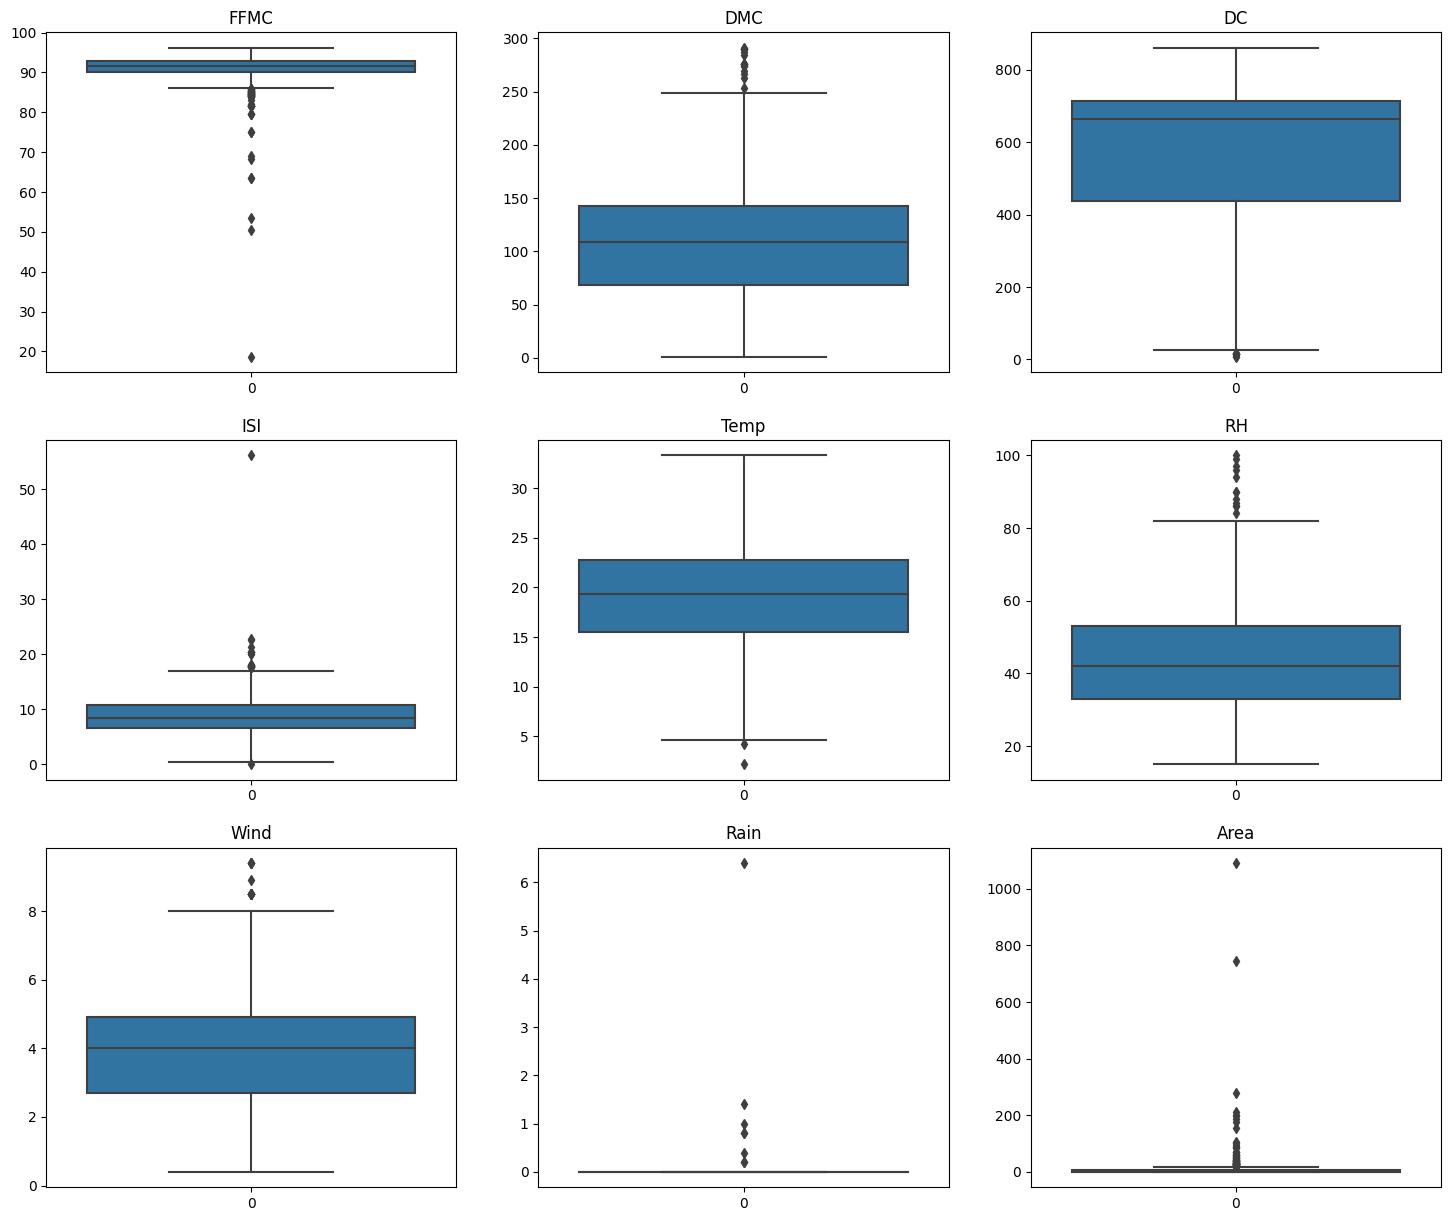

In [29]:
# Plotting multiple boxplots within the same figure
fig, axes = plt.subplots(3, 3, figsize = (18, 15))

sns.boxplot(ax = axes[0, 0], data = fire_data['FFMC']).set_title('FFMC')
sns.boxplot(ax = axes[0, 1], data = fire_data['DMC']).set_title('DMC')
sns.boxplot(ax = axes[0, 2], data = fire_data['DC']).set_title('DC')
sns.boxplot(ax = axes[1, 0], data = fire_data['ISI']).set_title('ISI')
sns.boxplot(ax = axes[1, 1], data = fire_data['temp']).set_title('Temp')
sns.boxplot(ax = axes[1, 2], data = fire_data['RH']).set_title('RH')
sns.boxplot(ax = axes[2, 0], data = fire_data['wind']).set_title('Wind')
sns.boxplot(ax = axes[2, 1], data = fire_data['rain']).set_title('Rain')
sns.boxplot(ax = axes[2, 2], data = fire_data['area']).set_title('Area')


As expected, there are drastic outliers in specific columns, namely:
- FFMC
- ISI
- Rain
- Area